## Harvest Season Prediction
### Introduction:
> Crop hervest season prediction is all about predicting the right time for plant harvesting base on some variable like Temperature, Humidity, Ph, Water availability, Crops, Country, The target variable in the dataset is harvest season.

> Using some machine learning algorithm to predict future occurence base on the trained values

> Finally deploy the model in user friendly manners that can actually enable the non tech farmers to easily access the app using streamlit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Crop_Data.csv')
print(df.shape)
df.head()


(1400, 7)


,temperature,humidity,ph,water availability,season,label,Country
0,20.879744,82.002744,6.502985,202.935536,rainy,rice,Nigeria
1,21.770462,80.319644,7.038096,226.655537,rainy,rice,Nigeria
2,23.004459,82.320763,7.840207,263.964248,rainy,rice,Nigeria
3,26.491096,80.158363,6.980401,242.864034,rainy,rice,Nigeria
4,20.130175,81.604873,7.628473,262.717340,rainy,rice,Nigeria


In [3]:
#df.rename(columns={'label':'crop'}, inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   temperature         1400 non-null   float64
 1   humidity            1400 non-null   float64
 2   ph                  1400 non-null   float64
 3   water availability  1400 non-null   float64
 4   season              1400 non-null   object 
 5   label               1400 non-null   object 
 6   Country             1400 non-null   object 
dtypes: float64(4), object(3)
memory usage: 76.7+ KB


In [5]:
df.describe()

,temperature,humidity,ph,water availability
count,1400.000000,1400.000000,1400.000000,1400.000000
mean,24.971621,64.611062,6.565246,91.784651
std,4.081622,22.753785,0.835101,58.682258
min,15.330426,14.258040,3.504752,20.211267
25%,22.178239,56.824217,6.068795,51.546542
50%,25.140245,68.288321,6.524478,72.379183
75%,27.963227,82.710409,7.042343,107.428334
max,36.977944,94.962187,9.935091,298.560117


In [6]:
obj_col=df.select_dtypes('object').columns
obj_col

Index(['season', 'label', 'Country'], dtype='object')

In [7]:
for col in obj_col:
    print(df[col].unique())

['rainy' 'winter' 'spring' 'summer']
['rice' 'maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans'
 'mungbean' 'blackgram' 'lentil' 'watermelon' 'muskmelon' 'cotton' 'jute']
['Nigeria' 'South Africa' 'Kenya' 'Sudan']


### EXPLORATORY DATA ANALYSIS

In [8]:
#WATER AVAILABILITY ACCORDING TO THE PLANT AND REGION
print('Average Water Required for the cultivation of each crops across the countres')
water= df.groupby(['Country','label'])['water availability'].mean().reset_index(name='Average')
water=(water.pivot_table(index=['label'], columns=['Country'], values='Average'))
water

Average Water Required for the cultivation of each crops across the countres


Country,Kenya,Nigeria,South Africa,Sudan
label,,,,
blackgram,67.477377,67.115972,69.378335,67.264928
chickpea,78.008508,78.448305,83.330868,86.415897
cotton,75.869686,80.490387,81.242154,80.888709
jute,172.767702,177.287943,173.249384,172.061178
kidneybeans,99.844908,109.712343,102.687906,94.522681
lentil,47.662876,45.384485,46.262756,43.467640
maize,83.277771,83.656932,86.671954,89.463750
mothbeans,55.157945,49.766110,51.122975,67.324112
mungbean,56.786181,47.616815,48.136631,47.396526


The average amount of water necessary for the plantation of each crops according to the regions is displayed in the table above with Jute, pigeonpeas and rice having more demand for water before cultivation.

In [9]:
#WATER AVAILABILITY ACCORDING TO THE PLANT AND REGION
print('Average Water Required for the cultivation of each crops base on the season')
water_= df.groupby(['season','label'])['water availability'].mean().reset_index(name='Average')
water_=(water_.pivot_table(index=['label'], columns=['season'], values='Average'))
water_

Average Water Required for the cultivation of each crops base on the season


season,rainy,spring,summer,winter
label,,,,
blackgram,NaN,NaN,NaN,67.884151
chickpea,NaN,NaN,NaN,80.058977
cotton,NaN,NaN,NaN,80.398043
jute,174.792798,NaN,NaN,NaN
kidneybeans,NaN,105.919778,NaN,NaN
lentil,45.680454,NaN,NaN,NaN
maize,84.766988,NaN,NaN,84.766988
mothbeans,NaN,NaN,51.198487,NaN
mungbean,48.403601,NaN,NaN,NaN


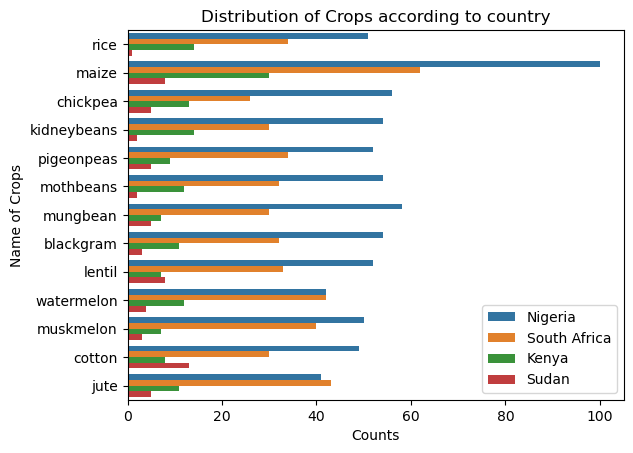

In [10]:
sb.countplot(data=df, y='label', hue='Country')
plt.title('Distribution of Crops according to country')
plt.ylabel('Name of Crops')
plt.xlabel('Counts')
plt.legend()
plt.show()

In [11]:
df['Country'].value_counts()

Nigeria         713
South Africa    468
Kenya           155
Sudan            64
Name: Country, dtype: int64

In [251]:
df['season'].value_counts()

rainy     600
winter    400
summer    300
spring    100
Name: season, dtype: int64

In [252]:
df.groupby('season')['label'].nunique()

season
rainy     6
spring    1
summer    3
winter    4
Name: label, dtype: int64

In [253]:
df.groupby('Country')['season'].nunique()

Country
Kenya           4
Nigeria         4
South Africa    4
Sudan           4
Name: season, dtype: int64

In [254]:
num_col=df.select_dtypes('number').columns
num_col

Index(['temperature', 'humidity', 'ph', 'water availability'], dtype='object')

<Axes: >

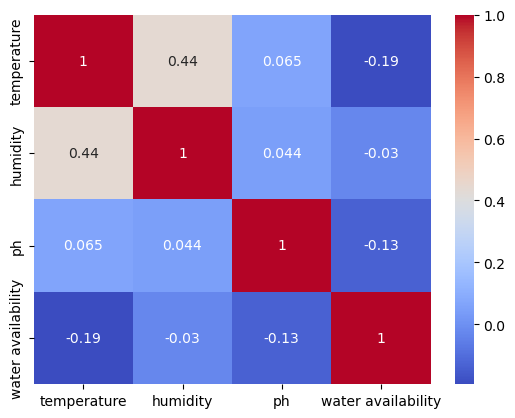

In [255]:
sb.heatmap(df[num_col].corr(), cmap='coolwarm', annot=True)

In [256]:
df_copy=df.copy()
df2=df.copy()

In [257]:
from sklearn.preprocessing import LabelEncoder

In [258]:
encoder=LabelEncoder()
df_copy['encoded_season']=encoder.fit_transform(df_copy['season'])
df_copy['encoded_label']=encoder.fit_transform(df_copy['label'])
df_copy['encoded_country']=encoder.fit_transform(df_copy['Country'])

In [259]:
df2['encoded_season']=encoder.fit_transform(df2['season'])

In [260]:
X=pd.get_dummies(df2, columns=['label', 'Country'])
X.head()

,temperature,humidity,ph,water availability,season,encoded_season,label_blackgram,label_chickpea,label_cotton,label_jute,...,label_mothbeans,label_mungbean,label_muskmelon,label_pigeonpeas,label_rice,label_watermelon,Country_Kenya,Country_Nigeria,Country_South Africa,Country_Sudan
0,20.879744,82.002744,6.502985,202.935536,rainy,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,21.770462,80.319644,7.038096,226.655537,rainy,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,23.004459,82.320763,7.840207,263.964248,rainy,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,26.491096,80.158363,6.980401,242.864034,rainy,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,20.130175,81.604873,7.628473,262.717340,rainy,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [261]:
X.to_csv('encoded_data1.csv', index=False)

In [219]:
season_dict=dict(zip(df2['season'].unique(), X['encoded_season'].unique()))
season_dict_rev=dict(zip(X['encoded_season'].unique(), df2['season'].unique()))

In [220]:
season_dict

{'rainy': 0, 'winter': 3, 'spring': 1, 'summer': 2}

In [221]:
X.drop(columns=['season','encoded_season'], inplace=True)

In [159]:
y=df2['encoded_season']

In [160]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(scales)

In [161]:
scaled_df=pd.DataFrame(scaled_df, columns=['temperature','humidity','ph','water availability'])

In [162]:
col=X.columns
col

Index(['temperature', 'humidity', 'ph', 'water availability',
       'label_blackgram', 'label_chickpea', 'label_cotton', 'label_jute',
       'label_kidneybeans', 'label_lentil', 'label_maize', 'label_mothbeans',
       'label_mungbean', 'label_muskmelon', 'label_pigeonpeas', 'label_rice',
       'label_watermelon', 'Country_Kenya', 'Country_Nigeria',
       'Country_South Africa', 'Country_Sudan'],
      dtype='object')

In [197]:
import pickle

In [198]:
output=y
output, unique=pd.factorize(output)

In [163]:
needed=col[4:]

In [238]:
X.to_csv('encoded_data.csv', index=False)

In [164]:
print(type(X[needed]))
obj_data=X[needed]

<class 'pandas.core.frame.DataFrame'>


In [165]:
X.head()

,temperature,humidity,ph,water availability,label_blackgram,label_chickpea,label_cotton,label_jute,label_kidneybeans,label_lentil,...,label_mothbeans,label_mungbean,label_muskmelon,label_pigeonpeas,label_rice,label_watermelon,Country_Kenya,Country_Nigeria,Country_South Africa,Country_Sudan
0,20.879744,82.002744,6.502985,202.935536,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
1,21.770462,80.319644,7.038096,226.655537,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,23.004459,82.320763,7.840207,263.964248,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
3,26.491096,80.158363,6.980401,242.864034,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,20.130175,81.604873,7.628473,262.717340,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
x_train, x_test,y_train, y_test=train_test_split(X, y, test_size=.2, random_state=42)

In [168]:
x_train.shape, x_test.shape

((1120, 21), (280, 21))

In [169]:
y_train.shape

(1120,)

In [170]:
scaled_train=scaler.fit_transform(x_train)
scaled_test=scaler.fit_transform(x_test)

In [171]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
# import metric library
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [172]:
rand=RandomForestClassifier(n_estimators=100)
rand.fit(scaled_train,y_train)
feature_scores=pd.Series(rand.feature_importances_, index=X.columns).sort_values(ascending=False)

In [173]:
feature_scores

water availability      0.213053
humidity                0.147164
label_mothbeans         0.078351
label_watermelon        0.077678
label_kidneybeans       0.074297
ph                      0.054736
label_cotton            0.053451
label_blackgram         0.051426
temperature             0.050375
label_muskmelon         0.044310
label_chickpea          0.032953
label_mungbean          0.030749
label_lentil            0.029318
label_maize             0.022998
label_pigeonpeas        0.013117
label_rice              0.007900
label_jute              0.005547
Country_Nigeria         0.004008
Country_Kenya           0.003530
Country_South Africa    0.003493
Country_Sudan           0.001544
dtype: float64

<Axes: >

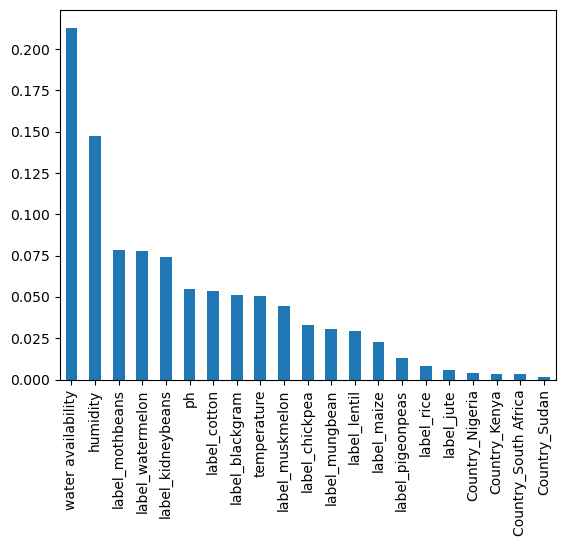

In [174]:
feature_scores.plot(kind='bar')

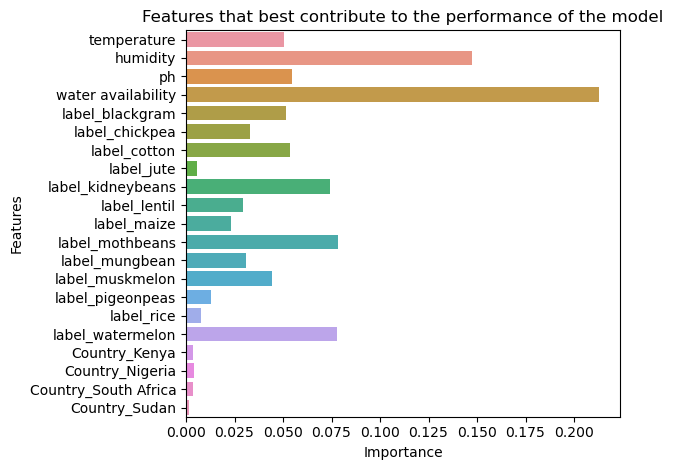

In [237]:
fig, ax =plt.subplots()
ax=sb.barplot(x= rand.feature_importances_, y=X.columns)
plt.title('Features that best contribute to the performance of the model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
fig.savefig('features_importance.png')

In [175]:
models={'random':RandomForestClassifier()
        ,'tree':DecisionTreeClassifier(),
        'xgboost':XGBClassifier(),
       'svc':SVC()}

In [176]:
def evaluate_model(model, x_train,x_test,y_train,y_test):
    train_scores=[]
    test_scores=[]
    name=[]
    np.random.seed(50)
    
    for key, model in model.items():
        #fit model
        model.fit(x_train, y_train)
        train_score= model.score(x_train,y_train)
        train_scores.append(train_score)
        test_score=model.score(x_test,y_test)
        test_scores.append(test_score)
        name.append(key)
        df=pd.DataFrame({'model':name,
                        'train_accuracy':train_scores, 'test_accuracy':test_scores})
    return df

In [177]:
%%time
score=evaluate_model(model=models,
                     x_train=scaled_train,
                     y_train=y_train,
                     x_test=scaled_test,
                     y_test=y_test,
                    )
score

CPU times: total: 2.3 s
Wall time: 2.03 s


,model,train_accuracy,test_accuracy
0,random,0.978571,0.885714
1,tree,0.978571,0.903571
2,xgboost,0.978571,0.878571
3,svc,0.940179,0.917857


In [178]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold

In [179]:
model_tree=DecisionTreeClassifier(random_state=4)
params={'criterion':['gini','entropy'],
       'max_depth':[2,4,6,8,10,12],
       'min_samples_split':[2,3]}
cv_method=RepeatedStratifiedKFold(n_splits=5,
                                 n_repeats=3,
                                 random_state=100)
gs_model=GridSearchCV(estimator=model_tree,
                     param_grid=params,
                     cv=cv_method,
                     verbose=1,
                     scoring='accuracy')

In [180]:
gs_model.fit(scaled_train,y_train)

Fitting 15 folds for each of 24 candidates, totalling 360 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=100),
             estimator=DecisionTreeClassifier(random_state=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12],
                         'min_samples_split': [2, 3]},
             scoring='accuracy', verbose=1)

In [181]:
gs_model.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 2}

In [182]:
gs_model.best_score_

0.9244047619047618

In [183]:
gs_model.cv_results_['mean_test_score']

array([0.72172619, 0.72172619, 0.89553571, 0.89553571, 0.91785714,
       0.91785714, 0.91190476, 0.91160714, 0.90863095, 0.90863095,
       0.90297619, 0.90327381, 0.60833333, 0.60833333, 0.90952381,
       0.90952381, 0.92440476, 0.92410714, 0.92083333, 0.92083333,
       0.91428571, 0.91428571, 0.91130952, 0.91190476])

In [184]:
result_df=pd.DataFrame(gs_model.cv_results_['params'])
result_df['test_score']=gs_model.cv_results_['mean_test_score']
result_df.head()

,criterion,max_depth,min_samples_split,test_score
0,gini,2,2,0.721726
1,gini,2,3,0.721726
2,gini,4,2,0.895536
3,gini,4,3,0.895536
4,gini,6,2,0.917857


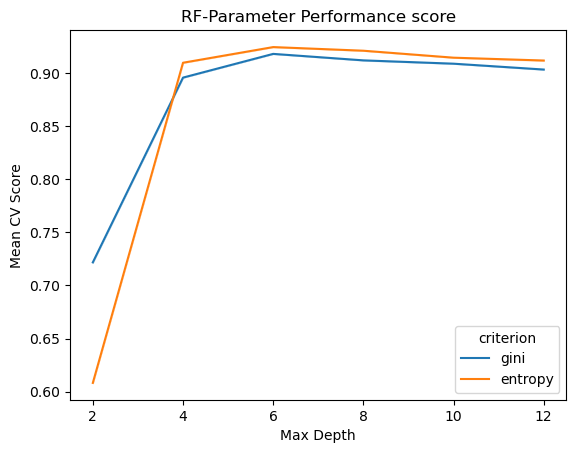

In [185]:
sb.lineplot(data=result_df, x='max_depth', y='test_score',hue='criterion')
plt.title('RF-Parameter Performance score')
plt.xlabel('Max Depth')
plt.ylabel('Mean CV Score');

In [186]:
best_model=DecisionTreeClassifier(criterion='entropy',max_depth=6, min_samples_split=2)

In [187]:
best_model.fit(scaled_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6)

In [188]:
predict_t=best_model.predict(scaled_test)

In [189]:
print('The accuracy score of the train data is {}%'. format(round(accuracy_score(predict_t,y_test),2)*100))

The accuracy score of the train data is 91.0%


In [190]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import f1_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [191]:
predict_scor=cross_val_predict(best_model, scaled_test,y_test,cv=3)

In [192]:
report= classification_report(y_test, predict_t)

In [193]:
print(report)

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       117
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        62
           3       0.87      0.83      0.85        81

    accuracy                           0.91       280
   macro avg       0.94      0.94      0.94       280
weighted avg       0.91      0.91      0.91       280



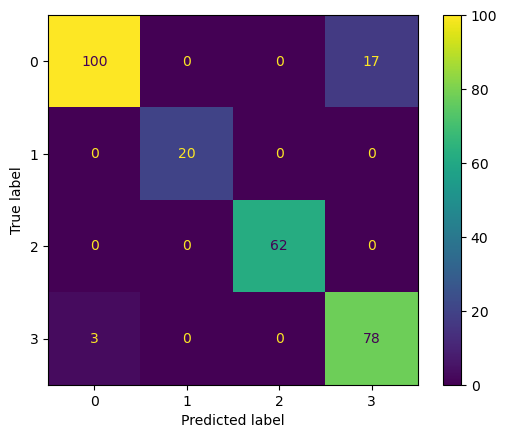

In [194]:
dist=ConfusionMatrixDisplay.from_predictions(y_test, predict_scor)
dist.plot;

In [196]:
### Season Label
season_dict_rev

{0: 'rainy', 3: 'winter', 1: 'spring', 2: 'summer'}

In [195]:
import joblib
joblib.dump(best_model,'model_used.joblib')

['model_used.joblib']

In [199]:
pickle_model=open('decision_tree.pickle','wb')
pickle.dump(best_model, pickle_model)
pickle_model.close()

In [200]:
data_pickle=open('dataset.pickle','wb')
pickle.dump(unique,data_pickle)
data_pickle.close()

In [235]:
scale=open('scaler.pickle','wb')
pickle.dump(scaler,scale)
scale.close()

### Conclussion
>The best model for the with highest test accuracy after tunning is Decision tree classifier, with test accuracy of 91% and train accuracy of 98% 

>The importance parameters that contribute to the performance of the model are water availability, humidity ph

> The best criterion is Entropy with max_depth of 6, min_samples_split of 2
